In [1]:
from Helper.Load.load import Base_Load
from Helper.Load.supervised import Supervised
from Helper.Load.regression import Regression
from Helper.Load.classification import Classification
from Helper.Visual.Visual import Visual
from Helper.Visual.classification import VClassification
from Helper.Transform.Transform.classification import Classificaton_Transform

import numpy as n
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
loadC = Classification("Data", "haberman.dat", "haberman-names.txt")
transformC = Classificaton_Transform(loadC)

In [3]:
transformC.assemble_pipelines()

(Pipeline(memory=None,
      steps=[('inputs', FeatureUnion(n_jobs=None,
        transformer_list=[('Age', Pipeline(memory=None,
      steps=[('Age_selector', NumberSelector(key='Age')), ('KBinsDiscretizer_transform', KBinsDiscretizer(encode='ordinal', n_bins=15, strategy='uniform'))])), ('Year', Pipeline(memory=None,
      steps=[('Year_selector', NumberSelector(key='Year')), ('K...('KBinsDiscretizer_transform', KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='uniform'))]))],
        transformer_weights=None))]), Pipeline(memory=None,
      steps=[('outputs', FeatureUnion(n_jobs=None,
        transformer_list=[('Survival', Pipeline(memory=None,
      steps=[('Survival_selector', TextSelector(key='Survival')), ('_LabelBinarizer_transform', <Helper.Transform.Custom.nominal._LabelBinarizer object at 0x1a17462780>)]))],
        transformer_weights=None))]))

In Visual-construct_figures


AttributeError: 'Classificaton_Transform' object has no attribute '__name__'

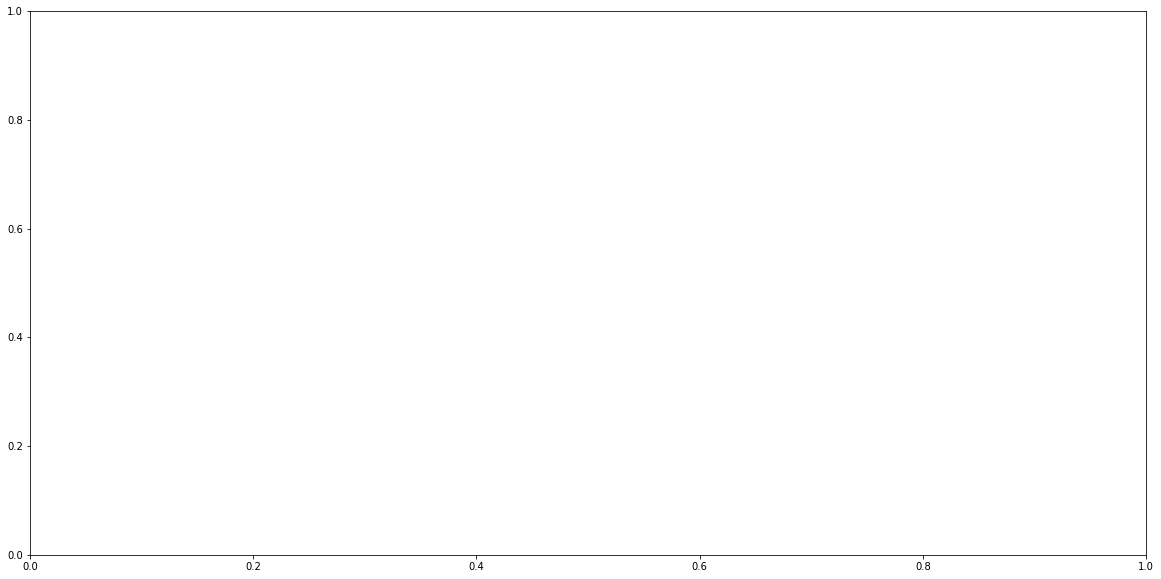

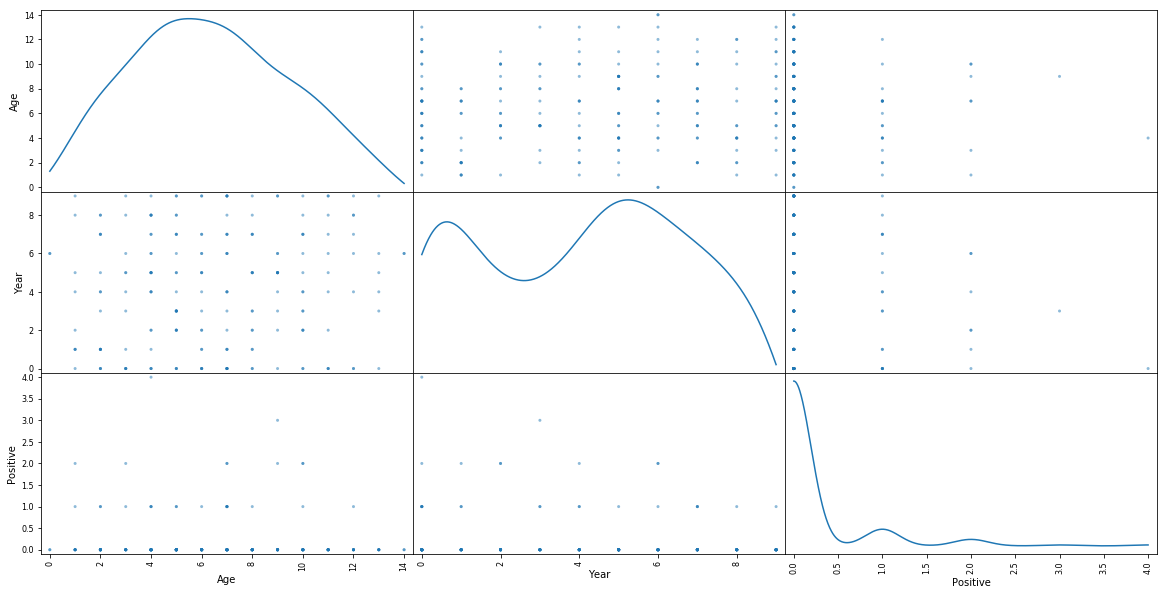

In [4]:
VClassification(transformC)
VClassification(loadC)